In [7]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

from sklearn.model_selection import train_test_split

def split(X_, index):
    y_ = [index]*len(X_)
    return train_test_split(X_, y_, test_size=0.33, random_state=42)

import glob

def get_fft_set(file_names):
    fft_set = []
    for files in file_names:
        data = pd.read_csv(files)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

def fft_from_data_frame(data_frame):
    fs= 1.14e6
    signal_set = []
    nan_indexes = np.where(np.any(np.isnan(data_frame.values), axis=1))
    data_frame_values = np.delete(data_frame.values, nan_indexes, axis=0)
    for row in data_frame_values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

car_side_1 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/26_Ford_Black_side/*_overall.csv')
car_side_2 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/89_VW_Black_Side/*_overall.csv')
car_side_3 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/91_Hyundai_Grey_Side/*_overall.csv')
wall = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Wall/*_overall.csv')
pillar = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Pillar/*_overall.csv')
human = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Human/*_overall.csv')
human_1 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Human_A/*_overall.csv')
human_2 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Human_B/*_overall.csv')
human_3 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Human_C/*_overall.csv')
human_4 = glob.glob('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Human_D/*_overall.csv')

car_side_fft_1 = get_fft_set(car_side_1)
car_side_fft_2 = get_fft_set(car_side_2)
car_side_fft_3 = get_fft_set(car_side_3)
wall_fft = get_fft_set(wall)
pillar_fft = get_fft_set(pillar)
human_fft = get_fft_set(human)
human_fft_1 = get_fft_set(human_1)
human_fft_2 = get_fft_set(human_2)
human_fft_3 = get_fft_set(human_3)
human_fft_4 = get_fft_set(human_4)


In [8]:
car = len(car_side_fft_1) + len(car_side_fft_2) + len(car_side_fft_3)
wall = len(wall_fft)
pillar = len(pillar_fft)
human = len(human_fft) + len(human_fft_1) + len(human_fft_2) + len(human_fft_3) + len(human_fft_4)

print("Car: ", car)
print("Wall: ", wall)
print("Pillar: ", pillar)
print("Human: ", human)

result = car + wall + pillar + human
print("Total data: ", result)

Car:  9392
Wall:  5651
Pillar:  5885
Human:  10667
Total data:  31595


In [9]:
human = human_fft + human_fft_1 + human_fft_2 + human_fft_3 + human_fft_4
X_Human_train, X_Human_test, y_Human_train, y_Human_test = split(human, 'HUMAN')

Non_Human = car_side_fft_1 + car_side_fft_2 + car_side_fft_3 + wall_fft + pillar_fft
X_Non_Human_train, X_Non_Human_test, y_Non_Human_train, y_Non_Human_test = split(Non_Human, 'NOT HUMAN')

X_Human_Non_Human_train = X_Human_train + X_Non_Human_train
# X_Human_Non_Human_test = np.nan_to_num(X_Human_test + X_Non_Human_test)
X_Human_Non_Human_test = (X_Human_test + X_Non_Human_test)

y_Human_Non_Human_train = y_Human_train + y_Non_Human_train
y_Human_Non_Human_test = y_Human_test + y_Non_Human_test

# np.nan_to_num(X)

print(np.array(X_Human_train).shape,np.array(X_Human_test).shape, np.array(y_Human_train).shape, np.array(y_Human_test).shape)
print(np.array(X_Non_Human_train).shape, np.array(X_Non_Human_test).shape, np.array(y_Non_Human_train).shape, np.array(y_Non_Human_test).shape)
# print(len(X_Human_Non_Human_train))
# print(len(X_Human_Non_Human_test))
# print(len(y_Human_Non_Human_train))
# print(len(y_Human_Non_Human_test))


(7146, 18) (3521, 18) (7146,) (3521,)
(14021, 18) (6907, 18) (14021,) (6907,)


In [10]:
from sklearn import preprocessing
normalized_X_Human_Non_Human_train = preprocessing.normalize(X_Human_Non_Human_train)

normalized_X_Human_Non_Human_test = preprocessing.normalize(X_Human_Non_Human_test)

print('X train data : ',np.array(X_Human_Non_Human_train).shape)
print('y train data : ',np.array(y_Human_Non_Human_train).shape)
print('X test data : ',np.array(X_Human_Non_Human_test).shape)
print('y test data : ',np.array(y_Human_Non_Human_test).shape)

X train data :  (21167, 18)
y train data :  (21167,)
X test data :  (10428, 18)
y test data :  (10428,)


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(y_test, result):
    cm = confusion_matrix(y_test, result)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(y_test, result)

    from sklearn.metrics import precision_score, recall_score, f1_score
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
#     print('Recall: Class A',recall_CLASS_A)
#     print('Recall: Class B',recall_CLASS_B)
#     print('F1-Score: Class A',f1_CLASS_A)
#     print('F1-Score: Class B',f1_CLASS_B)
#     print('Average F1-score:', f1_average)

    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

[[3147  374]
 [ 221 6686]]
Accuracy:  0.9429420790180284
Precision: Class A 0.93
Precision: Class B 0.95


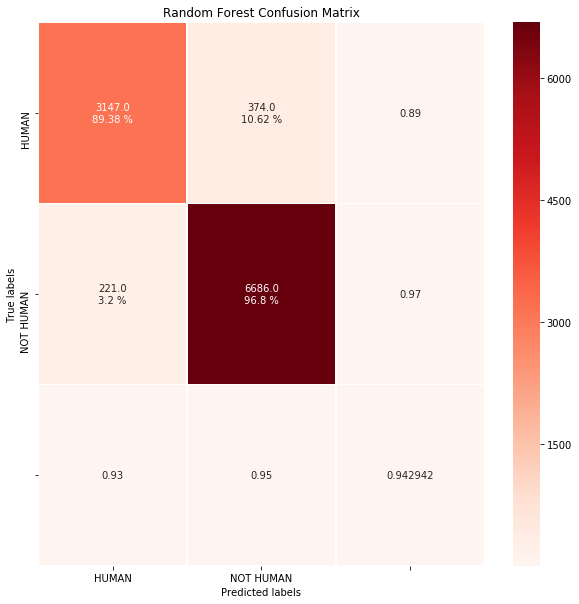

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(y_Human_Non_Human_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_Human_Non_Human_test, result))
labels = ['HUMAN', 'NOT HUMAN']
title = ('Random Forest Confusion Matrix')
create_confusion_matrix(y_Human_Non_Human_test, result)

[[1114  145]
 [  30 5727]]
0.9750570125427594
Precision: Class A 0.97
Precision: Class B 0.98


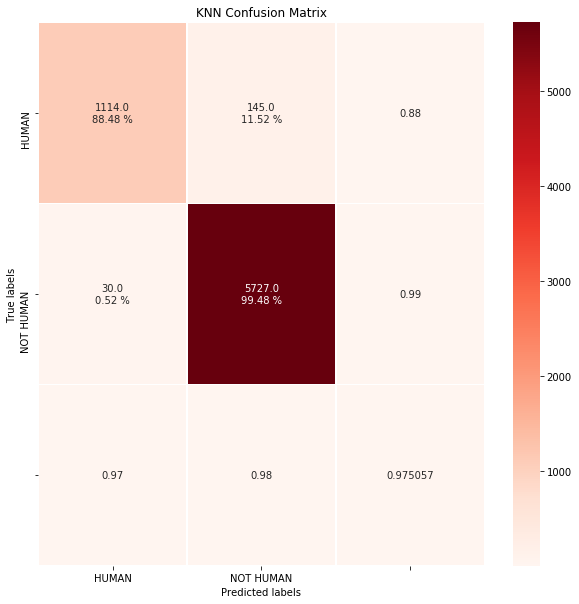

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)


# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)

cm = confusion_matrix(y_Human_Non_Human_test, result)
print(cm)
print(accuracy_score(y_Human_Non_Human_test, result))
labels = ['HUMAN', 'NOT HUMAN']
title = ('KNN Confusion Matrix')
create_confusion_matrix(y_Human_Non_Human_test, result)

[[3151  370]
 [ 228 6679]]
Accuracy:  0.9426543920214806
Precision: Class A 0.93
Precision: Class B 0.95


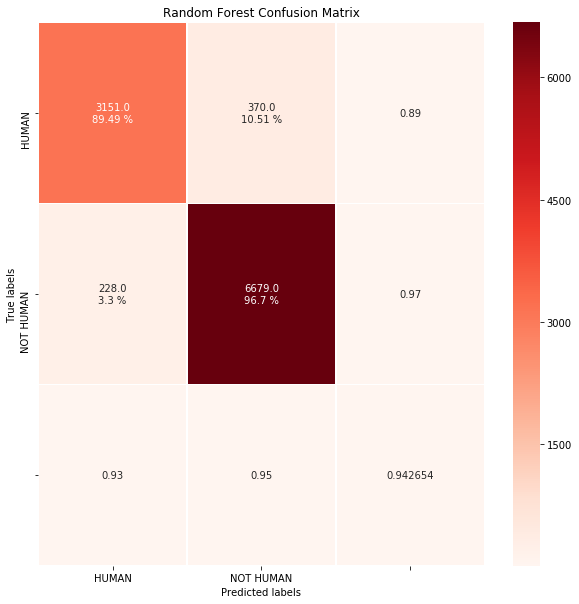

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_Human_Non_Human_train, y_Human_Non_Human_train)
result = clf.predict(normalized_X_Human_Non_Human_test)

cm = confusion_matrix(y_Human_Non_Human_test, result)
print(cm)
print("Accuracy: ",accuracy_score(y_Human_Non_Human_test, result))
labels = ['HUMAN', 'NOT HUMAN']
title = ('Random Forest Confusion Matrix')
create_confusion_matrix(y_Human_Non_Human_test, result)